# Exploratory Data Analysiss

# 1. Dataset introduction

The project, developed by me and other 3 colleagues of mine (Nicola Bombini, Francesco Donelli, Giuseppe Giadone), aims to analyze and then make a forecast (test) of the [Wind Energy in Germany dataset](https://www.kaggle.com/datasets/aymanlafaz/wind-energy-germany) using a time series modeling approach.

It was part of the Time Series Analysis course in the MSc Data Analytics for Business.

The dataset contains measurements of daily temperature, wind production and capacity from 2017 to 2019

The columns in the dataset are :

- utc_timestamp : Time in UTC
- wind_generation : Daily wind production in MW
- wind_capacity : Electrical capacity of wind in MW
- temperature : Daily Temperature in degrees C

# 2. Data and packages import

In [2]:
import pandas as pd
import numpy as np
import statsmodels
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.style.use('bmh')
from scipy import stats

In [3]:
df = pd.read_csv('data\germany-wind-energy.csv')

In [4]:
df.head()

,utc_timestamp,wind_generation_actual,wind_capacity,temperature
0,2017-01-01 00:00:00+00:00,291760.0,37149.130,-2.117
1,2017-01-02 00:00:00+00:00,295097.0,37152.125,-1.154
2,2017-01-03 00:00:00+00:00,666170.0,37155.208,-0.239
3,2017-01-04 00:00:00+00:00,686581.0,37160.125,0.620
4,2017-01-05 00:00:00+00:00,261759.0,37163.542,-3.908


In [5]:
df.shape

(1094, 4)

The dataset contains 1094 daily observations

## 2.1 Data transformation

In [10]:
print(np.min(df['wind_generation_actual'].values),np.max(df['wind_generation_actual'].values))

16482.0 998899.0


Due to the very large range of the values of the wind generation and to model them better, we center the value around the mean and take the square root of them:

In [11]:
z = np.sqrt(df['wind_generation_actual'].values)

z = z - np.mean(z)

## 2.2 Distributional checks

Now we can check the distribution of the data to see if we need more adjustment or if it is possible to start modeling.

**Series plot:**

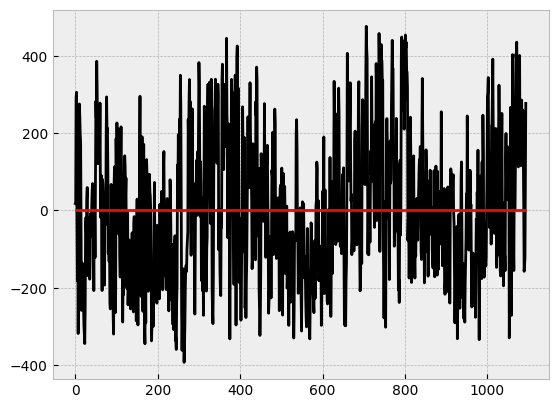

In [14]:
plt.plot(z, color = 'black')
plt.hlines(0,0,1094, color="red")
plt.show()

In [48]:
shapiro_test = stats.shapiro(z)
shapiro_test

ShapiroResult(statistic=0.980571985244751, pvalue=6.320653722635683e-11)

In [73]:
jarque_bera_test = stats.jarque_bera(z)
jarque_bera_test

SignificanceResult(statistic=36.49383495639782, pvalue=1.1897738722572147e-08)

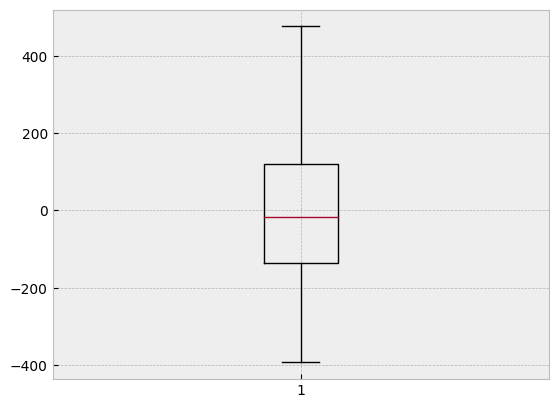

In [75]:
plt.boxplot(z)
plt.show()

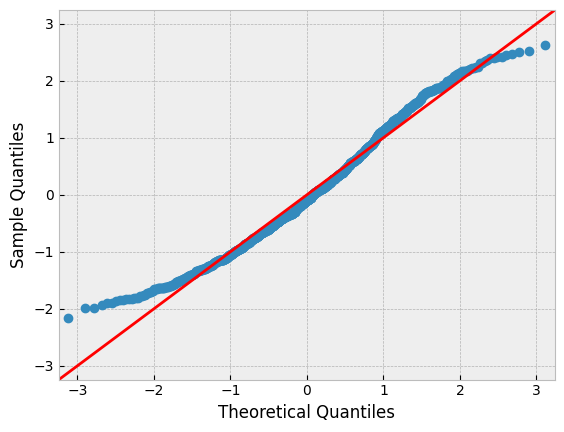

In [76]:
sm.qqplot(z, line="45", fit=True)   # the default comparing distribution is the normal, so we don't need to specify it
                                               # line="45" create the bisector line
                                               # fit=True will scale the plotted data
plt.show()

Both the statistics told us that we cannot assume normality distribution, but looking at the different plots the distribution seems however okay to model, so we shouldn't find big problems.

## 2.3 Autocorrelation analysis

We then look at the autocorrelation function to see how data are correlated in time, and to see if there is an indication on the parameter to choose for a potential Moving Average model. Looking at the plot, with a lag of 50 we can see that no tick goes under the blue band, hence no useful suggestion for a potential MA(q) model, and furthermore we can say that the observations have a relevant dependence at least on the previous 50 ones.


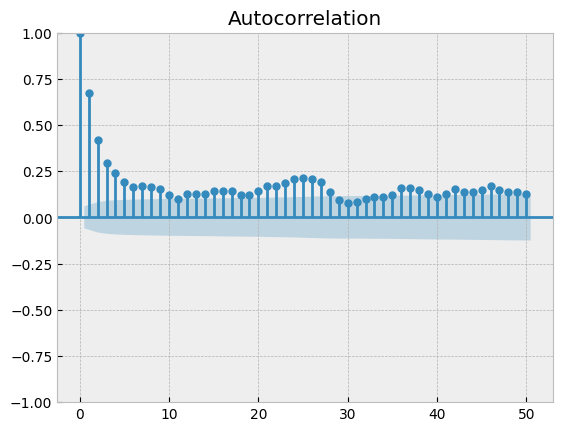

In [81]:
statsmodels.graphics.tsaplots.plot_acf(z,lags=50);
plt.show();

We now take a look at the partial autocorrelation function, which checks the correlation between 2 observations located at a certain lag, given the observations between them as fixed. Moreover, it can be used as a tool to find the optimal parameter for an auto-regressive model. From the plot, we can see that he PACF value goes under the blue bands at lag 4, which means that the optimal number of parameters for an AR(p) model is 3.

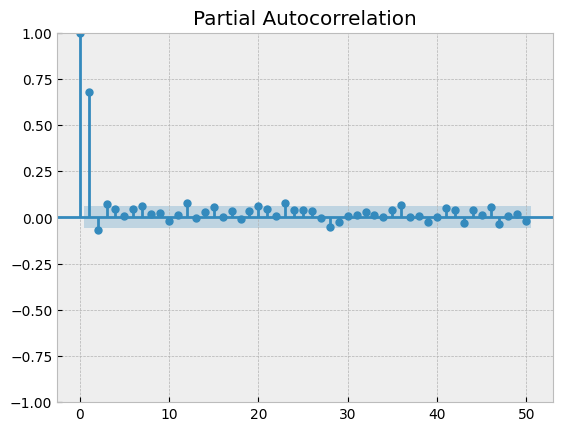

In [80]:
statsmodels.graphics.tsaplots.plot_pacf(z,lags=50);
plt.show();